# Time Point Algebras

In [1]:
>>> import os
>>> import qualreas as qr

In [2]:
>>> path = os.path.join(os.getenv('PYPROJ'), 'qualreas')

## References

1. James F. Allen, <b>"Maintaining knowledge about temporal intervals"</b>,  Communications of the ACM 26(11) pp.832-843, Nov. 1983
1. J. F. A. K. van Benthem, <b>“The Logic of Time”</b>, D. Reidel Publishing Co., 1983
1. Alfred J. Reich, <b>"Intervals, Points, and Branching Time"</b>, In: Goodwin, S.D., Hamilton, H.J. (eds.) Proceedings of the TIME-94 International Workshop on Temporal Reasoning, University of Regina, Regina, SK, Canada, pp. 121–133, 1994

## The Structures of Linear and Branching Time

The point (and interval) algebras of time, supported by qualreas, consider the structure of time to be either linear or branching as shown in the figures below.

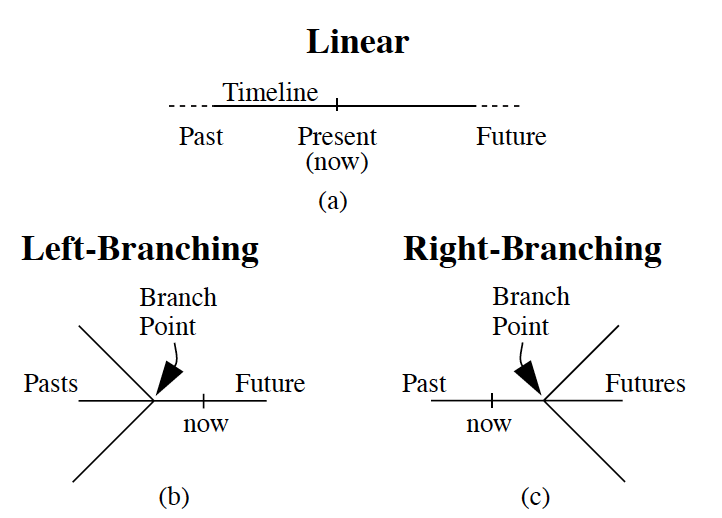

In [3]:
from IPython.display import Image  # Only needed to display figures here
Image(filename='../docs/_static/global_structures_of_time.png', width="400")

### Point Structure

According to [van Benthem, 1983] a <b><i>Point Structure</i></b> is an ordered pair, $(\mathcal{T},\prec)$, where $\mathcal{T}$ is a non-empty set and $\prec$ is a transitive binary relation on $\mathcal{T}$.  Equality is denoted by $=$, and the converse of $\prec$ is $\succ$.

### Linear Point Structure

A <b><i>Linear Point Structure</i></b> is a Point Structure, $(\mathcal{T},\prec)$, such that for any two points, $x,y \in \mathcal{T}$, <b>one and only one</b> of the following three relationships holds:

<p>$(x \prec y) \vee (x = y) \vee (x \succ y)$</p>

<b>Example:</b> If $\mathbb{R}$ is the set of real numbers, then both $(\mathbb{R},<)$ and $(\mathbb{R},\le)$ are Linear Point Structures.

### Branching Point Structure

A <b><i>Branching Point Structure</i></b> is an ordered triple, $(\mathcal{T},\prec,\sim)$, where $(\mathcal{T},\prec)$ is a Point Structure and $\sim$ is an irreflexive, symmetric binary relation on $\mathcal{T}$, called <b><i>incomparable</i></b>, such that for any $x,y \in \mathcal{T}$, <b>one and only one</b> of the following four relationships holds:

<p>$(x \prec y) \vee (x = y) \vee (x \succ y) \vee (x \sim y)$</p>

Basically, if $x$ and $y$ are on two different branches, then $x \sim y$.

#### Binary-Branching vs. Poly-Branching

There is a subtle difference in the composition of the incomparable relation with itself ($\sim;\sim$) depending on whether only two branches are allowed at a branch point (binary-branching) or more than two branches are allowed (poly-branching).  

* binary-branching: $(\sim ; \sim) = \{\prec, =, \succ\}$
* poly-branching: $(\sim ; \sim) = \{\prec, =, \succ, \sim\}$

### Right-Branching Point Structure

A <b>Right-Branching Point Structure</b> is a Branching Point Structure that has the property of <b><i>Left Linearity</i></b>:

<p>$x,y,z \in \mathcal{T}$ and $(x < z) \wedge (y < z) \implies (x < y) \vee (x = y) \vee (x > y)$</p>

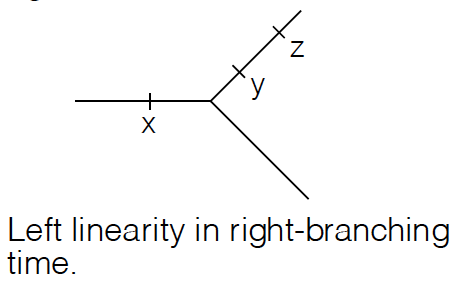

In [4]:
Image(filename='../docs/_static/left_linearity_in_right_branching_time.png', width="300")

### Left-Branching Point Structure

A <b>Left-Branching Point Structure</b> is a Branching Point Structure that has the property of <b><i>Right Linearity</i></b>:

<p>$x,y,z \in \mathcal{T}$ and $(x > z) \wedge (y > z) \implies (x < y) \vee (x = y) \vee (x > y)$</p>

<b>NOTE:</b> In the branching point algebras defined in qualreas, we distinguish between the right & left incomparable ($\sim$) relations by putting an "r" or an "l" in front of $\sim$ (i.e., "r\~", "l\~").  This is not really necessary, since right and left branching point structures cannot be mixed together, but this is how things got started in qualreas, so it remains that way, for now.  In the discussion, below, the left and right branching <i>incomparable</i> relations are denoted by $\underset{L}{\sim}$ and $\underset{R}{\sim}$, respectively.

## Linear Point Algebra

This algebra is based on the Linear Point Structure, $(\mathbb{R},<)$, and is used to derive Allen's algebra of proper time intervals [Allen, 1983]--known in qualreas as the "Linear Interval Algebra". (See the Jupyter Notebook, <i>"Notebooks/derive_allens_algebra.ipynb"</i>)

An extension to Allen's algebra, the "Extended Linear Interval Algebra" [Reich, 1994], integrates proper time intervals with time points by using the Linear Point Structure, $(\mathbb{R},\le)$. (See the Jupyter Notebook, <i>"Notebooks/derive_extended_interval_algebra.ipynb"</i>)

In [5]:
>>> pt_alg = qr.Algebra(os.path.join(path, "Algebras/Linear_Point_Algebra.json"))

>>> pt_alg.summary()

  Algebra Name: Linear_Point_Algebra
   Description: Linear Point Algebra
 Equality Rels: =
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
           LessThan (  <)         GreaterThan (  >)    False      False       True         Pt            Pt
             Equals (  =)              Equals (  =)     True       True       True         Pt            Pt
        GreaterThan (  >)            LessThan (  <)    False      False       True         Pt            Pt

Domain & Range Abbreviations:
   Pt = Point
 PInt = Proper Interval


* <b>EDITORS NOTE: The function call to <i>print_point_algebra_composition_table</i>, below, causes issues with the automated documentation system used here (Sphinx) because the specific elements printed out (equality & inequality symbols) "confuse" the system that parses reST (restructured text).  Consequently, the next cell is set to be "Raw NBConvert" instead of "Code", and then an image of its proper output (from a version of this Jupyter notebook) is shown below it, to depict how the output should look.  The same trick is applied to all 5 of the calls to <i>print_point_algebra_composition_table</i> in this document. (Sorry for the interruption.)</b>

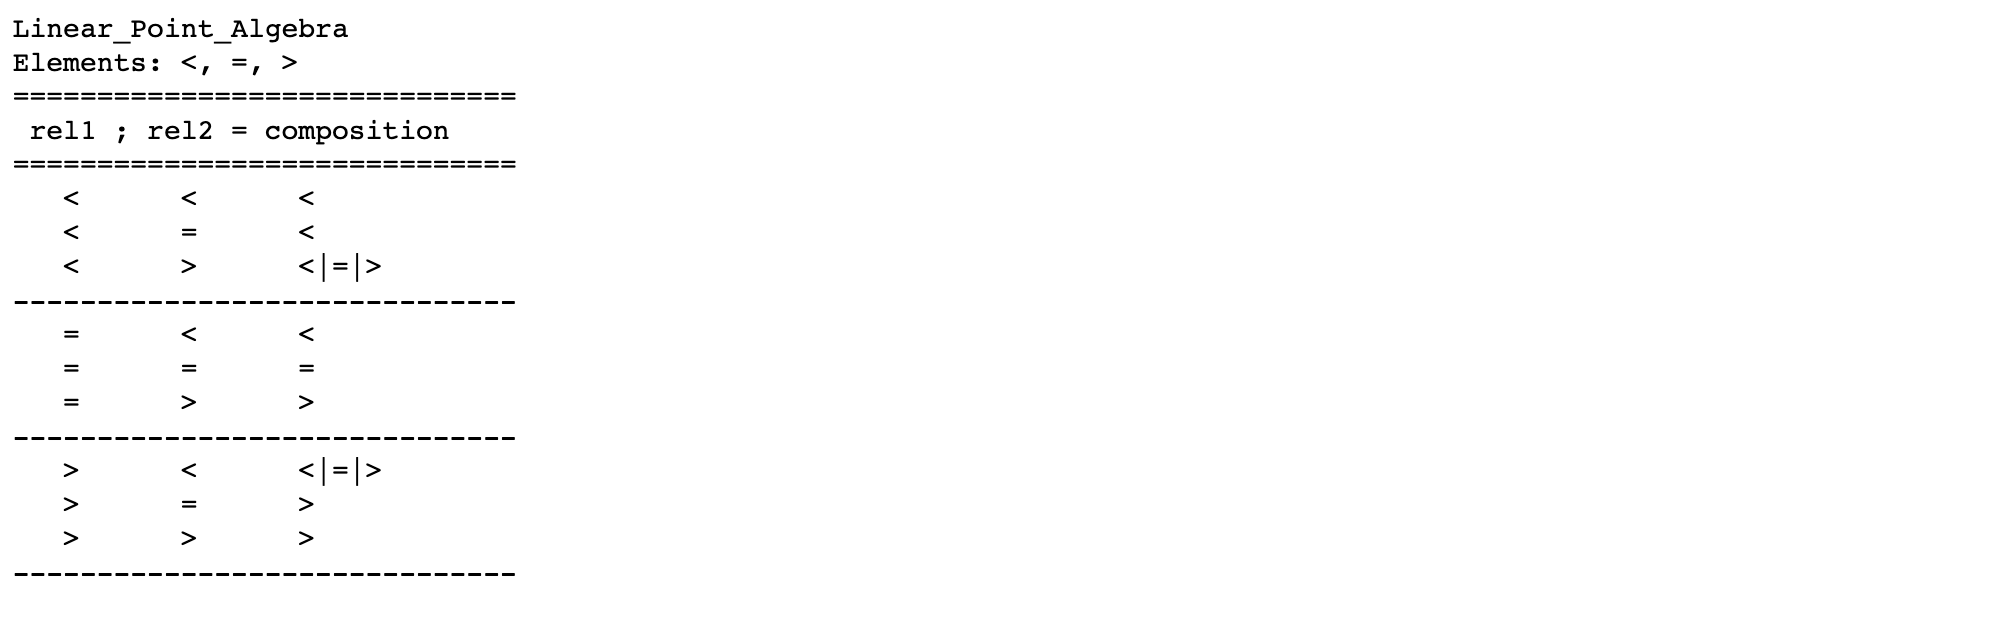

In [6]:
Image(filename='../docs/_static/Linear_Pt_Alg_Elements.png')

## Right-Branching Point Algebra

An extension to Allen's algebra, the "Right-Branching Interval Algebra" [Reich, 1994], integrates proper time intervals with time points in a poly-branching, right-branching time structure, by using the Right-Branching Point Structure, $(\mathbb{R},\le, \underset{R}{\sim})$, below. (See the Jupyter Notebook, <i>"Notebooks/derive_right_branching_interval_algebra.ipynb"</i>)

In [7]:
>>> rb_pt_alg = qr.Algebra(os.path.join(path, "Algebras/Right_Branching_Point_Algebra.json"))

>>> rb_pt_alg.summary()

  Algebra Name: Right_Branching_Point_Algebra
   Description: Right-Branching Point Algebra
 Equality Rels: =
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
           LessThan (  <)         GreaterThan (  >)    False      False       True         Pt            Pt
             Equals (  =)              Equals (  =)     True       True       True         Pt            Pt
        GreaterThan (  >)            LessThan (  <)    False      False       True         Pt            Pt
       Incomparable ( r~)        Incomparable ( r~)    False       True      False         Pt            Pt

Domain & Range Abbreviations:
   Pt = Point
 PInt = Proper Interval


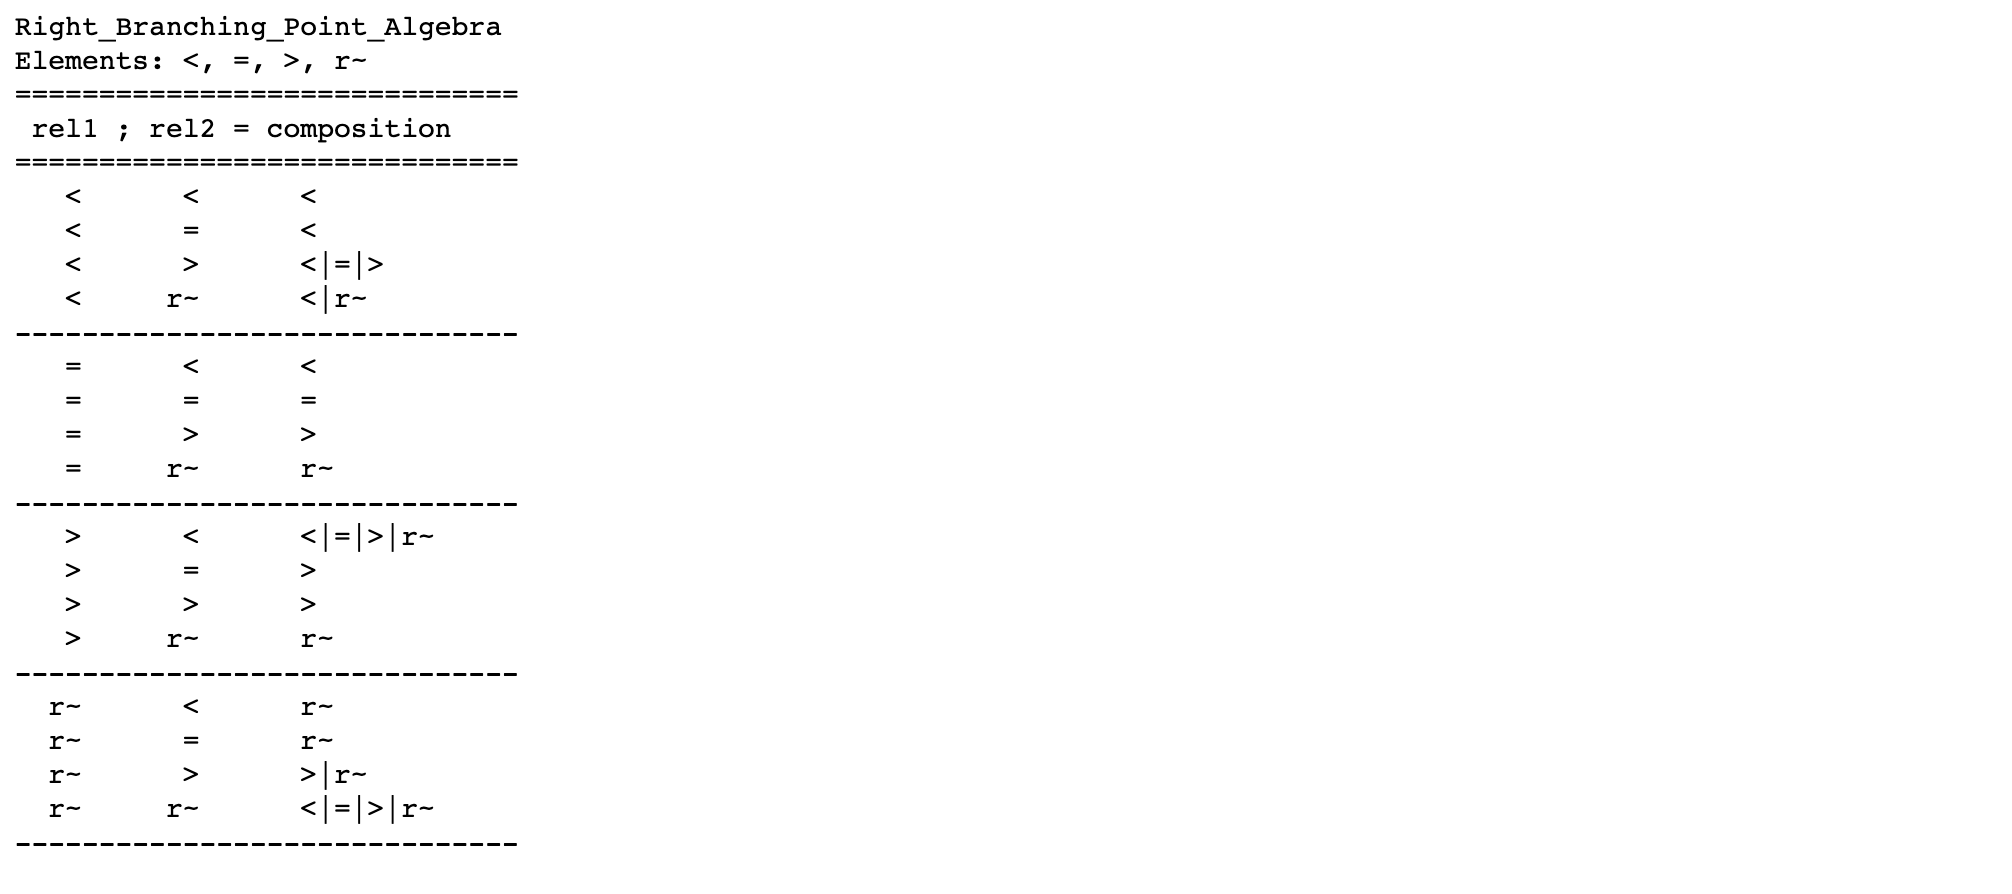

In [8]:
Image(filename='../docs/_static/Rt_Branching_Pt_Alg_Elements.png')

## Left-Branching Point Algebra

An extension to Allen's algebra, the "Left-Branching Interval Algebra" [Reich, 1994], integrates proper time intervals with time points in a poly-branching, left-branching time structure, by using the Left-Branching Point Structure, $(\mathbb{R},\le, \underset{L}{\sim})$, below. (See the Jupyter Notebook, <i>"Notebooks/derive_right_branching_interval_algebra.ipynb"</i>)

In [9]:
>>> lb_pt_alg = qr.Algebra(os.path.join(path, "Algebras/Left_Branching_Point_Algebra.json"))

>>> lb_pt_alg.summary()

  Algebra Name: Left_Branching_Point_Algebra
   Description: Left-Branching Point Algebra
 Equality Rels: =
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
           LessThan (  <)         GreaterThan (  >)    False      False       True         Pt            Pt
             Equals (  =)              Equals (  =)     True       True       True         Pt            Pt
        GreaterThan (  >)            LessThan (  <)    False      False       True         Pt            Pt
       Incomparable ( l~)        Incomparable ( l~)    False       True      False         Pt            Pt

Domain & Range Abbreviations:
   Pt = Point
 PInt = Proper Interval


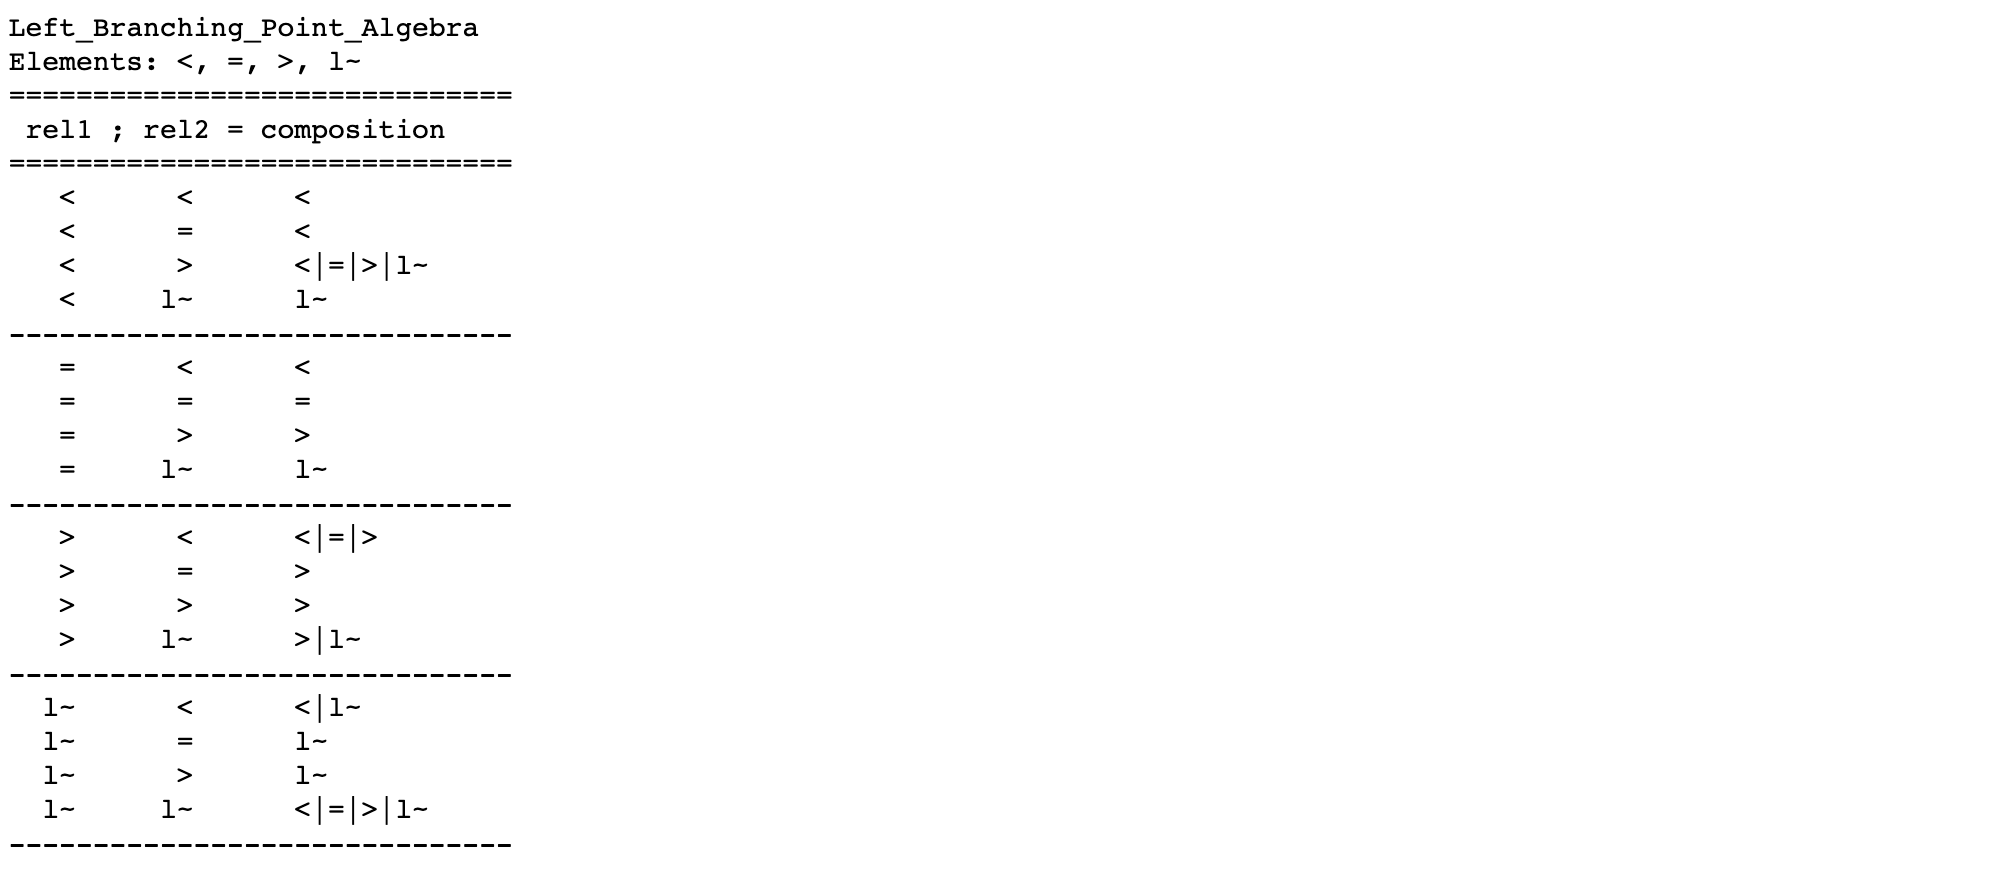

In [10]:
Image(filename='../docs/_static/Lf_Branching_Pt_Alg_Elements.png')

## Right-Binary-Branching Point Algebra

The "Right-Binary-Branching Interval Algebra", is Allen's algebra of proper intervals, situated in a binary-branching, right-branching time structure, and is derived using the Right-Binary-Branching Point Structure, $(\mathbb{R},\le, \underset{L}{\sim})$, below.  (See the Jupyter Notebook, <i>"Notebooks/derive_right_binary_branching_interval_algebra.ipynb"</i>)

In [11]:
>>> rbb_pt_alg = qr.Algebra(os.path.join(path, "Algebras/Right_Binary_Branching_Point_Algebra.json"))

>>> rbb_pt_alg.summary()

  Algebra Name: Right_Binary_Branching_Point_Algebra
   Description: Right-Binary-Branching Point Algebra
 Equality Rels: =
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
           LessThan (  <)         GreaterThan (  >)    False      False       True         Pt            Pt
             Equals (  =)              Equals (  =)     True       True       True         Pt            Pt
        GreaterThan (  >)            LessThan (  <)    False      False       True         Pt            Pt
       Incomparable ( r~)        Incomparable ( r~)    False       True      False         Pt            Pt

Domain & Range Abbreviations:
   Pt = Point
 PInt = Proper Interval


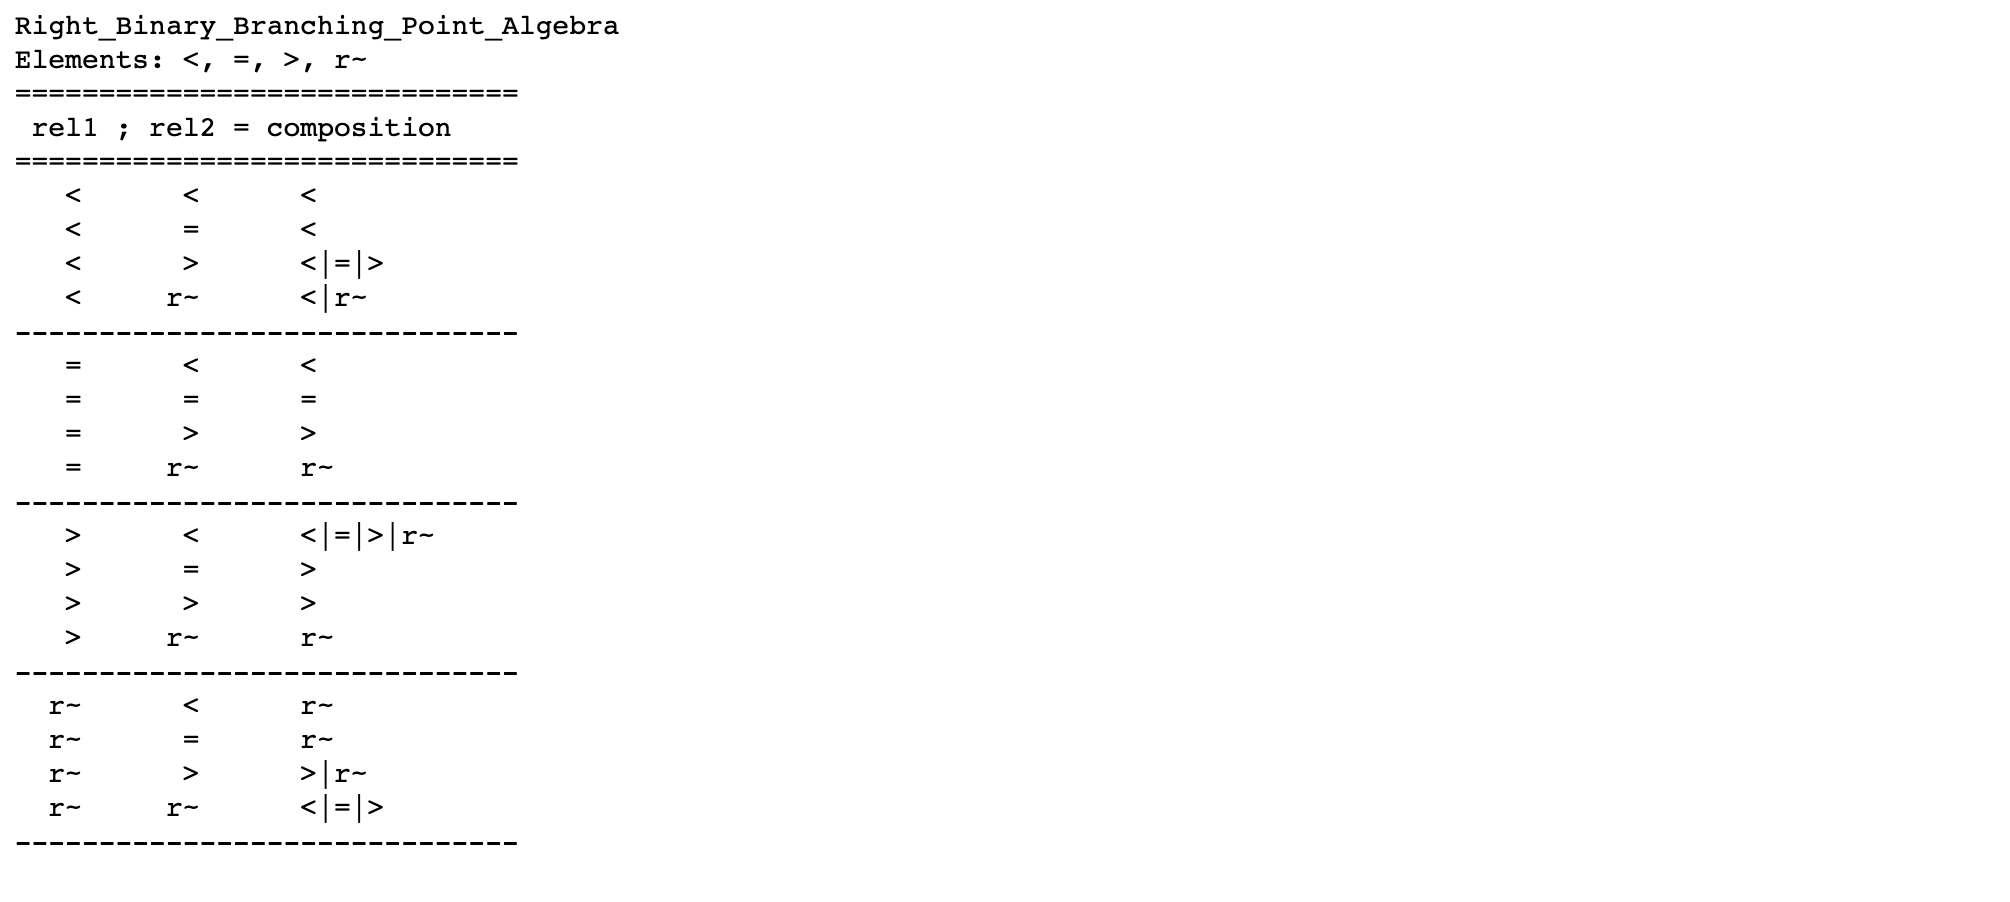

In [12]:
Image(filename='../docs/_static/Rt_Bin_Branching_Pt_Alg_Elements.png')

## Left-Binary-Branching Point Algebra

The "Left-Binary-Branching Interval Algebra", is Allen's algebra of proper intervals, situated in a binary-branching, left-branching time structure, and is derived using the Left-Binary-Branching Point Structure, $(\mathbb{R},\le, \underset{L}{\sim})$, below.
(See the Jupyter Notebook, <i>"Notebooks/derive_left_binary_branching_interval_algebra.ipynb"</i>)

In [13]:
>>> lbb_pt_alg = qr.Algebra(os.path.join(path, "Algebras/Left_Binary_Branching_Point_Algebra.json"))

>>> lbb_pt_alg.summary()

  Algebra Name: Left_Binary_Branching_Point_Algebra
   Description: Left-Binary-Branching Point Algebra
 Equality Rels: =
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
           LessThan (  <)         GreaterThan (  >)    False      False       True         Pt            Pt
             Equals (  =)              Equals (  =)     True       True       True         Pt            Pt
        GreaterThan (  >)            LessThan (  <)    False      False       True         Pt            Pt
       Incomparable ( l~)        Incomparable ( l~)    False       True      False         Pt            Pt

Domain & Range Abbreviations:
   Pt = Point
 PInt = Proper Interval


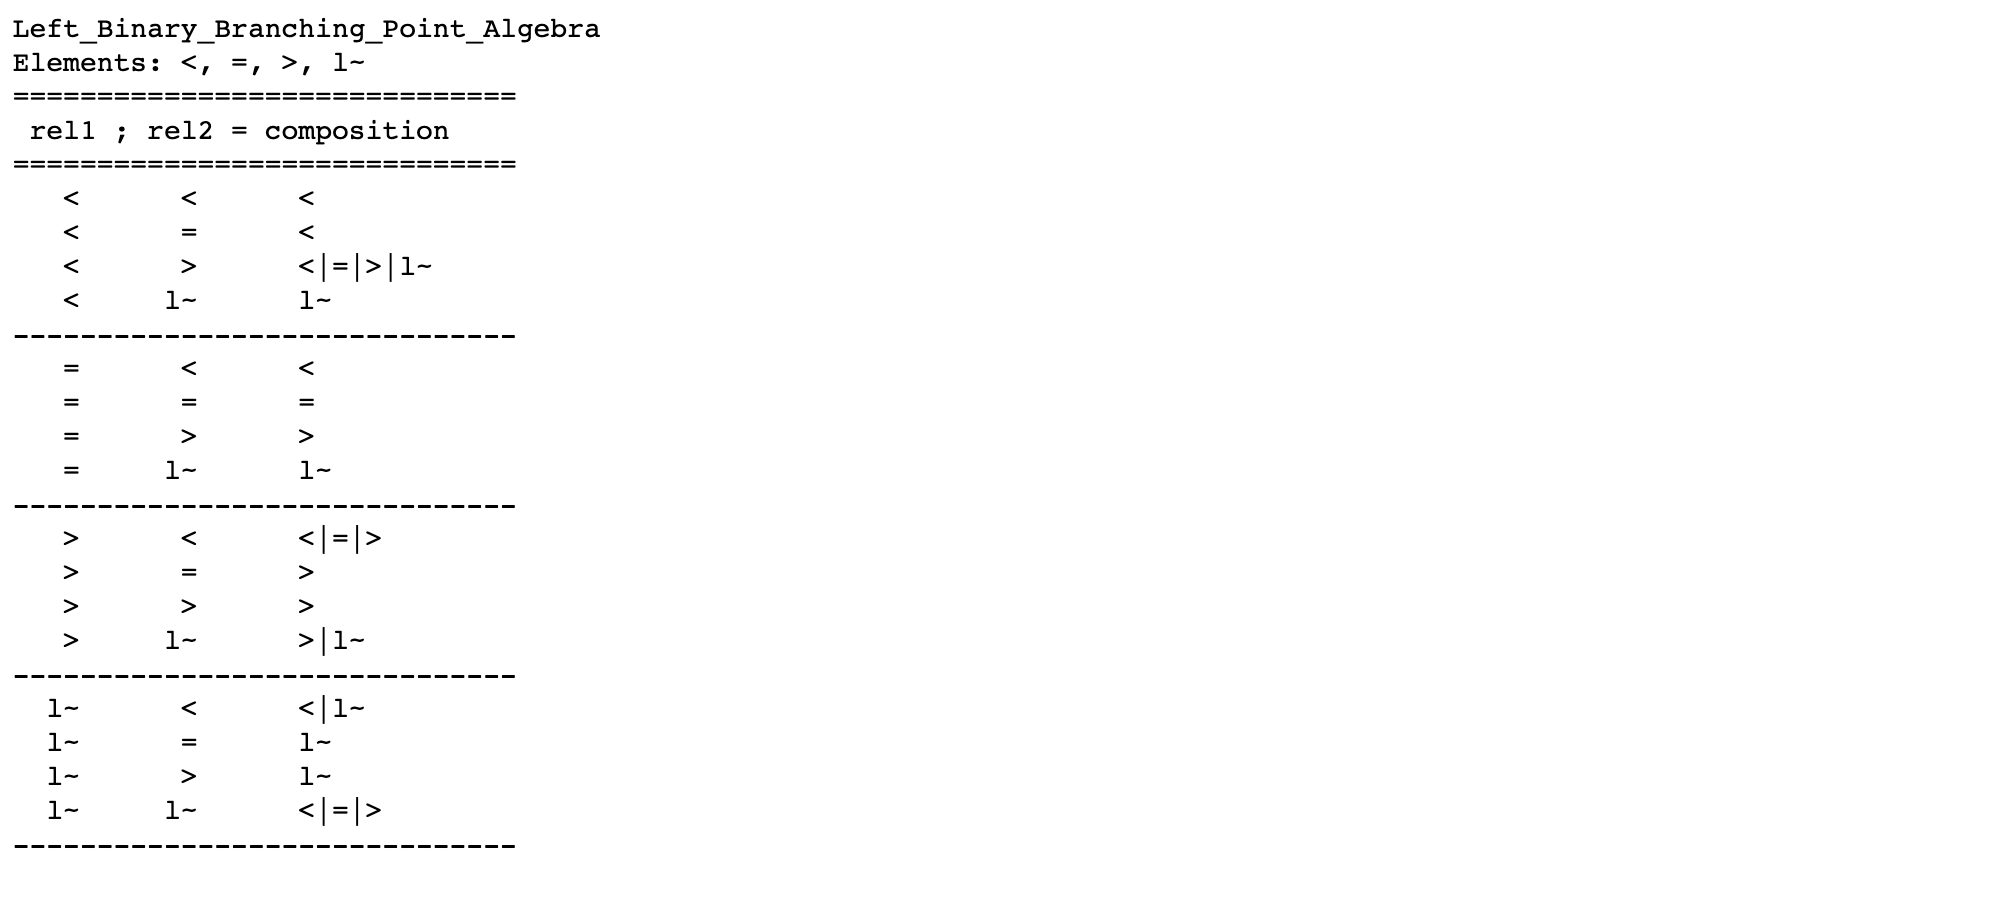

In [14]:
Image(filename='../docs/_static/Lf_Bin_Branching_Pt_Alg_Elements.png')